In [1]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *
from time import time
from scipy.sparse import  spdiags

Autosaving every 300 seconds


# Différences finies 1D
L'objectif ici est de présenter la discrétisation différence finie 1D pour le problème de Dirichlet homogène:
$$
\begin{align}
&-u''(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1)=0.
\end {align}
$$
## Approximation de la dérivée seconde
On rappelle que si $u$ est une fonction $\mathcal C^4$, alors
$$
-u''(x)=\frac {-u(x-h)+2u(x)-u(x+h)}{h^2}+\mathcal O(h^2).
$$
Cette formule, basée sur des évaluations de $u$ pour approcher $u''$ lorsque le réel $h>0$ est petit, va servir d'approximation évaluée en de nombreux points distants de $h$. Il s'en suivra un système linéaire.

On introduit la discrétisation uniforme du segment $]0,1[$ par 
$$
x_i=i h, \quad i=0\cdots N+1,
$$
avec $h=\frac 1 {N+1}$.
Pour $i=1$ à $N$, on va approcher l'équation $-u''(x_i)=f(x_i)$. Pour $i=0$ et $i=N+1$, on va utiliser la condition limite. On note $u_i\sim u(x_i)$ et $f_i=f(x_i)$ satisfaisant 
$$
\begin {align}
&u_0=0\\
&\frac {-u_{0}+2u_1-u_2}{h^2}=f_1\\
&\frac {-u_{1}+2u_2-u_3}{h^2}=f_2\\
&\cdots\\
&\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}=f_i\\
&\cdots\\
&\frac {-u_{N-1}+2u_N-u_{N+1}}{h^2}=f_ N\\
&u_{N+1}=0.
\end {align}
$$
En éliminant la première et la dernière equation substituées dans la deuxième et avant-dernière equation, il vient le système de $N$ inconnues $U=(u_1,\cdots,u_N)^t$ suivant:
$$
A U=F,\quad F=(f_1,\cdots,f_N)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\matrix{&2&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&2}\right )
$$
L'objectif est alors de construire ce système linéaire en python. On utilisera la gestion creuse des matrices à l'aide des outils de la bibliothèque scipy.




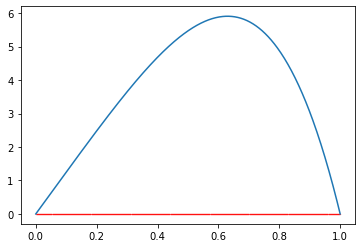

In [2]:
#importation des bibliothèques utiles
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
# le pas h
N=600
h=1/(N+1)
#h=1
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2#-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=2/h**2*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
#resolution du systeme creux
U=spsolve(A,F)
#Ajout des CL de Dirichlet
U_avec_CL=zeros(N+2)
U_avec_CL[1:N+1]=U
plot(x_avec_CL,U_avec_CL)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')
#print(A.toarray())

## Dirichlet inhomogène
Construire la solution du problème de Dirichlet inhomogène
$$
\begin{align}
&-u''(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=a\\
&u(1)=b.
\end {align}
$$
Choisir $f$ $a$ et $b$ à votre guise.

## Condition limite périodique
Soit le problème,
$$
\begin{align}
&-u''(x)+u(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1), \quad u'(0)=u'(1).
\end {align}
$$
qui revient à supposer $u$ $1-$périodique et $\mathcal C^1$.

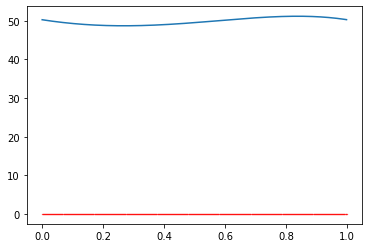

In [3]:
#importation des bibliothèques utiles
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
# le pas h
N=600
h=1/(N)
#h=1
# construction du vecteur de discrétisation
x=linspace(0,1-h,N)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2#-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=(2/h**2+1)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A+=spdiags(D1,[N-1],N,N)+spdiags(D1,[-N+1],N,N)
#resolution du systeme creux
U=spsolve(A,F)

plot(x,U)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')
#print(A.toarray())

   ## Neuman homogène
Construisons la solution du problème de Neuman homogène
$$
\begin{align}
&-u''(x) +u(x)=f(x),\quad \forall x\in ]0,1[,\\
&u'(0)=u'(1)=0.
\end {align}
$$
On introduit la discrétisation uniforme du segment $]0,1[$ par 
$$
x_i=i h, \quad i=0\cdots N-1,
$$
avec $h=\frac 1 {N-1}$.
Pour $i=0$ à $N-1$, on va approcher l'équation $-u''(x_i)+u(x_i)=f(x_i)$ de la même manière que pour le problème de Dirichlet. On note $u_i\sim u(x_i)$ et $f_i=f(x_i)$.
Pour $i=0$ et $i=N-1$, on introduit alors $u_{-1}$ et $u_{N}$ qu'il convient d'éliminer par la condition limite de Neuman homogène. On remarque que la différence centrée qui approche la dérivée ($u'(x)=\frac {u(x+h)-u(x-h)} {2h}$) permet d'écrire
$$
u_{-1}=u_1,\quad u_{N}=u_{N-2}.
$$
On a alors le système linéaire
$$
\left \{\begin {align}
&u_{-1}=u_1\\
&\frac {-u_{-1}+2u_0-u_1}{h^2}+u_0=f_0\\
&\frac {-u_{0}+2u_1-u_2}{h^2}+u_1=f_1\\
&\frac {-u_{1}+2u_2-u_3}{h^2}+u_2=f_2\\
&\cdots\\
&\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}+u_i=f_i\\
&\cdots\\
&\frac {-u_{N-2}+2u_{N-1}-u_{N}}{h^2}+u_{N-1}=f_{N-1}\\
&u_{N}=u_{N-2}.
\end {align}\right .
$$
En éliminant la première et la dernière equation substituées dans la deuxième et avant-dernière equation, il vient le système de $N$ inconnues $U=(u_0,\cdots,u_{N-1})^t$ suivant:
$$
A U=F,\quad F=\left (f_0,\cdots,f_{N-1}\right)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\matrix{&2&-2&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-2&2}\right )+Id
$$
Par soucis de symétrie dans le système et parce que cela est pertinent pour les méthodes de résolution de système linéaire, on symétrise le système en divisant par $2$ la première et dernière équation du système. On obtient alors le système:
$$
A U=F,\quad F=\left(\frac {f_{0}}2,f_1,\cdots,f_{N-2},\frac {f_{N-1}}2\right)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\matrix{&1&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&1}\right )+\left (\matrix{&\frac 1 2&0& &\cdots&0\\
&0&1&0& &\cdots\\
&&0&1&0& \\
&-&-&-&-&-\\
& &\cdots& &0&\frac 1 2}\right )
$$


L'objectif est alors de construire ce système linéaire en python. On utilisera la gestion creuse des matrices à l'aide des outils de la bibliothèque scipy.

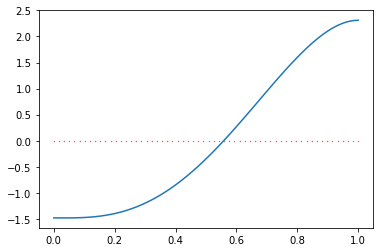

In [4]:
# le pas h
N=60
h=1/(N-1)
# construction du vecteur de discrétisation
x=linspace(0,1,N)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2-100*x
#construction du second membre du systeme
F=f(x)
F[0]=0.5*F[0]
F[N-1]=0.5*F[N-1]
#construction de la matrice en systeme creux
D0=(2/h**2+1)*ones(N)
D0[0]=0.5*D0[0]
D0[N-1]=0.5*D0[N-1]
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
U=spsolve(A,F)
plot(x,U)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')

## Neuman inhomogène
Construire la solution du problème de Neuman inhomogène
$$
\begin{align}
&-u''(x) +u(x)=f(x),\quad \forall x\in ]0,1[,\\
&u'(0)=a\\
&u'(1)=b.
\end {align}
$$
Choisir $f$ $a$ et $b$ à votre guise.

## Robin inhomogène
Construire la solution du problème de Robin inhomogène
$$
\begin{align}
&-u''(x) =f(x),\quad \forall x\in ]0,1[,\\
&-u'(0)+d_0 u(0)=a\\
&u'(1)+d_1 u(1)=b.
\end {align}
$$
Choisir $f$ $d_0>0$ et $d_1>0$ $a$ et $b$ à votre guise.

Construisons la solution du problème de Robin inhomogène en se basant sur la même approche que pour le problème de Neuman.
$$
\begin{align}
&-u''(x) +u(x)=f(x),\quad \forall x\in ]0,1[,\\
&-u'(0)+d_0 u(0)=a\\
&u'(1)+d_1 u(1)=b.
\end {align}
$$
On introduit la discrétisation uniforme du segment $]0,1[$ par 
$$
x_i=i h, \quad i=0\cdots N-1,
$$
avec $h=\frac 1 {N-1}$.
Pour $i=0$ à $N-1$, on va approcher l'équation $-u''(x_i)+u(x_i)=f(x_i)$. On note $u_i\sim u(x_i)$ et $f_i=f(x_i)$.
Pour $i=0$ et $i=N-1$, on introduit alors $u_{-1}$ et $u_{N}$ qu'il convient d'éliminer par la condition limite. On remarque que la différence centrée qui approche la dérivée ($u'(x)=\frac {u(x+h)-u(x-h)} {2h}$) permet d'écrire
$$
u_{-1}=u_1 - 2hd_0 u_0 +2ha,\quad u_{N}=u_{N-2}- 2hd_1u_{N-1} +2hb.
$$
On a alors le système linéaire
$$
\left \{\begin {align}
&u_{-1}=u_1- 2hd_0u_0 +2ha\\
&\frac {-u_{-1}+2u_0-u_1}{h^2}+u_0=f_0\\
&\frac {-u_{0}+2u_1-u_2}{h^2}+u_1=f_1\\
&\frac {-u_{1}+2u_2-u_3}{h^2}+u_2=f_2\\
&\cdots\\
&\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}+u_i=f_i\\
&\cdots\\
&\frac {-u_{N-2}+2u_{N-1}-u_{N}}{h^2}+u_{N-1}=f_{N-1}\\
&u_{N}=u_{N-2}- 2hd_1u_{N-1} +2hb.
\end {align}\right .
$$
En éliminant la première et la dernière equation substituées dans la deuxième et avant-dernière equation, il vient le système de $N$ inconnues $U=(u_0,\cdots,u_{N-1})^t$ suivant:
$$
A U=F,\quad F=\left (f_0,\cdots,f_{N-1}\right)^t+\left (\frac {2a} h,0,\cdots,0,\frac {2b} h\right)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\matrix{&2+2hd_0&-2&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-2&2+2hd_1}\right )+Id
$$
Par soucis de symétrie dans le système et parce que cela est pertinent pour les méthodes de résolution de système linéaire, on symétrise le système en divisant par $2$ la première et dernière équation du système. On obtient alors le système:
$$
A U=F,\quad F=\left(\frac {f_{0}}2,f_1,\cdots,f_{N-2},\frac {f_{N-1}}2\right)^t+\left (\frac {a} h,0,\cdots,0,\frac {b} h\right)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\matrix{&1+hd_0&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&1+hd_1}\right )+\left (\matrix{&\frac 1 2&0& &\cdots&0\\
&0&1&0& &\cdots\\
&&0&1&0& \\
&-&-&-&-&-\\
& &\cdots& &0&\frac 1 2}\right )
$$


L'objectif est alors de construire ce système linéaire en python. On utilisera la gestion creuse des matrices à l'aide des outils de la bibliothèque scipy.
On remarque que ce problème contient en particulier le cas de Neuman inhomogène en choisissant $d_0=0$, $d_1=0$.

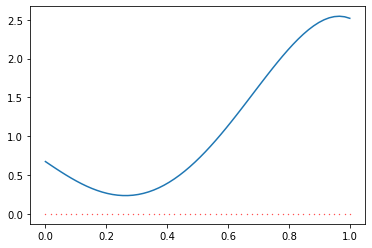

In [5]:
# le pas h
N=60
h=1/(N-1)
# construction du vecteur de discrétisation
x=linspace(0,1,N)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2-100*x
#parametre de CL
d0=2
d1=3
a=4
b=6
#construction du second membre du systeme
F=f(x)
F[0]=0.5*F[0]
F[N-1]=0.5*F[N-1]
# ajout du terme de bord inhomogene
F[0]+=a/h
F[N-1]+=b/h
#construction de la matrice en systeme creux
D0=(2/h**2+1)*ones(N)
D0[0]=0.5*D0[0]
D0[0]+= d0/h
D0[N-1]=0.5*D0[N-1]
D0[N-1]+=d1/h
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
U=spsolve(A,F)
plot(x,U)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')

## Estimation d'erreur
On va estimer l'erreur entre la solution approchée par la méthode des différences finies centrées et la solution exacte du problème . La théorie dit que l'erreur d'approximation  est d'ordre 2, c'est à dire de taille $\mathcal O(h^2)$ et fait plus précisément intervenir la dérivée quatrième de la solution exacte. Ainsi si la solution est un polynôme de degré inférieur ou égal à 3, la solution  approchée coincide avec la solution exacte en chacun des points de la discrétisation $x_i$.
Il conviendra donc de choisir une solution exacte qui n'est pas un olynôme de degré inférieur à 3 et qui satisfait bien-sûr les conditions limites.
### Problème de Dirichlet
Choisissons par exemple la solution non triviale $u(x)=\sin(x^2)\sin(x-1)$ du problème de Dirichlet
$$
\begin{align}
&-u''(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1)=0.
\end {align}
$$
Il convient de calculer $f$ afin de satisfaire que $u(x)=\sin(x^2)\sin(x-1)$ est bien solution. Pour des problèmes plus compliqué, on pourra faire appel au calcul formel avec la librairie sympy.

In [82]:
import sympy as sy
x=sy.symbols('x')
y=sy.sin(x**2)*sy.sin(x-1)
z=sy.diff(y,x)
z2=sy.diff(z,x)
print(-z2)

4*x**2*sin(x**2)*sin(x - 1) - 4*x*cos(x**2)*cos(x - 1) + sin(x**2)*sin(x - 1) - 2*sin(x - 1)*cos(x**2)


On sait désormais l'expression de $f$. On va alors construire cette fonction et définir la solution exacte. 
En définissant l'erreur entre la solution exacte et approchée, pour la norme de notre choix, comme une fonction python qui dépend de la taille de la discrétisation, on pourra alors calculer aisément l'erreur pour plusieurs discrétisation. La fonction construite sera également paramètrée par la fonction $f$, $u$ (solution exacte) et un entier qui caractérise la norme choisie.

0.00041144934293248345


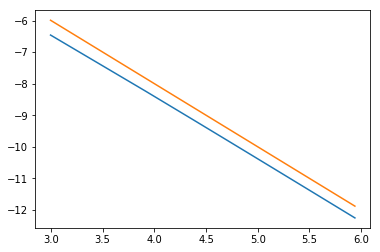

In [83]:
u=lambda x: sin(x**2)*sin(x-1)
f=lambda x: 4*x**2*sin(x**2)*sin(x - 1) - 4*x*cos(x**2)*cos(x - 1) + sin(x**2)*sin(x - 1) - 2*sin(x - 1)*cos(x**2)
#
# La fonction pour calculer l'erreur
#
def erreur_Dirchlet(N,u,f,p):
# N est le nombre de points de discrétisation
# u et f les fonctions passées en argumennt, on pourra en changer 
# en definissant d'autres fonctions
# p est l'entier pour la norme l^p
    h=1/(N+1)
    # construction du vecteur de discrétisation
    x=linspace(h,1-h,N)
    #construction du second membre du systeme
    F=f(x)
    #construction de la matrice en systeme creux
    D0=2/h**2*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    #resolution du systeme creux
    U=spsolve(A,F)
    #le vecteur erreur err
    err=abs(U-u(x))
    #on présente le graphe des erreurs selon les points de discretisation
#    plot(x,err)
#    print([ei**p for ei in err],sum([ei**p for ei in err]))
    normerr=sum([ei**p for ei in err])
    normerr=normerr**(1/p)
    #erreur relative
    normeU=sum([abs(ui)**p for ui in U])
    normeU=normeU**(1/p)
    #return max(err)/max(abs(U))
    return normerr/normeU

#on evalue l'erreur
print(erreur_Dirchlet(40,u,f,2))

errtab=[]
Ntab=[]
for N in range(20,400,30):
    Ntab.append(N)
    errtab.append(erreur_Dirchlet(N,u,f,2))
plot(log(Ntab),log(errtab),log(Ntab),-2*log(Ntab))

# Différences finies 2D
L'objectif ici est de présenter la discrétisation différence finie 2D pour le problème de Dirichlet homogène posé sur un rectangle:
$$
\begin{align}
-\Delta u(x,y)=f(x,y),&\quad \forall (x,y)\in \Omega=]0,L[\times]0,H[,\\
u(x,y)=0,& \quad \forall (x,y)\in \partial \Omega.
\end {align}
$$
## Approximation du Laplacien
On utilise la même approximation que dans le cas 1D pour la direction $x$ et pour la direction $y$,  si $u$ est une fonction $\mathcal C^4$, alors
$$
-\Delta u(x,y)=\frac {-u(x-l,y)+2u(x,y)-u(x+l,y)}{l^2}+\frac {-u(x,y-h)+2u(x,y)-u(x,y+h)}{h^2}+\mathcal O(l^2+h^2).
$$
Cette formule, basée sur des évaluations de $u$ sur une grille Cartésienne de pas $l$ dans la direction $x$ et de pas $h$ dans la direction $y$, va servir d'approximation de l'équation. Il s'en suivra un système linéaire dont le nombre d'inconnues est le nombre de points de grille internes au domaine $\Omega$.
On représente les points de la grille pour lesquels l'équation sera discrétisée.


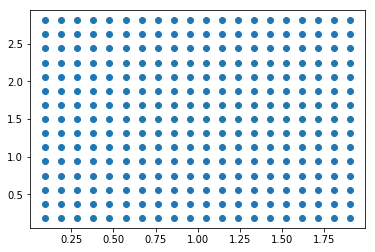

In [84]:
# taille du domaine [0,L]x[0,H]
L=2.;
H=3.;
# nombre de points de discretisation internes et pas de maillage
N=20;
M=15;
l=L/(N+1);
h=H/(M+1);
# vecteur discretisation selon x
x=linspace(l,L-l,N)
# vecteur discretisation selon y
y=linspace(h,H-h,M)
xx=M*list(x)
xx=array(xx)
yy=N*list(y)
yy=array(yy).reshape(N,M)
yy=yy.T
yy=yy.reshape(N*M)
plot(xx,yy,'o')

## Numérotation

Il convient alors de numéroter ces points à l'aide d'un seul indice en choisissant un sens de parcours de tous ces points. Puis, on écrira pour chacun d'eux la discrétisation et ainsi les coefficients de la matrice correspondante à ce parcours, ie cette numérotation. Pour le point numéro $k$, on sera en mesure de remplir la ligne numéro $k$ de la matrice. Celle-ci contiendra donc $NM$ lignes et colonnes.

La manière la plus classique de numéroter est de parcourir de gauche à droite depuis la ligne du bas jusqu'à la ligne du haut. Le premier point de chaque ligne est un point particulier car son voisin gauche tombe sur le bord. Il en va de même du dernier de chaque ligne dont le voisin de droite est sur le bord droit. La première et dernière ligne sont aussi des cas particuliers puisque le voisin du bas ou du haut tombe sur la bord bas ou haut.

Si on considère le noeud $k$ associé aux indices $1\le i\le N$ et $1\le j\le M$ de la numérotation horizontale et verticale, on a $k=num(i,j)=i+(j-1)N$. Si on choisit $k=num(i,j)$ de sorte que $1< i< N$ et $1< j< M$ (noeud non voisin du bord), le voisin de gauche a le numéro $k-1$, le voisin de droite a le numéro $k+1$, le voisin du bas a le numéro $k-N$, le voisin du haut a le numéro $k+N$.

## Structure de la matrice

On en déduit que la matrice sera pentadiagonale avec une diagonale principale, une sous-diagonale décalée de $1$, une sous-diagonale décalée de $N$, une sur-diagonale décalée de $1$, une sur-diagonale décalée de $N$.  
Il faudra gérer les cas particuliers des noeuds proche du bord afin de prendre en compte les voisins du bord pour lequel la solution est nulle (Dirichlet inhomogène).

L'assemblage se construit donc à l'aide de 5 diagonales dont il faudra corriger ou vérifier les $N$ premières lignes, les $N$ dernières lignes, ainsi que la première ligne de chaque sous-bloc de taille $N$ (points gauches) et ainsi que la dernière ligne de chaque sous-bloc de taille $N$ (points droits).

On doit se convaincre sur un brouillon que la matrice obtenue est symétrique. 


## Remplissage de la matrice en python

In [7]:
#2D
#Probleme Dirichlet homogene 2D 
#
# taille du domaine [0,L]x[0,H]
L=2.;
H=3.;
# nombre de points de discretisation et pas de maillage
N=100;
M=180;
#
l=L/(N+1);
h=H/(M+1);
# vecteur discretisation selon x
x=linspace(l,L-l,N)
# vecteur discretisation selon y
y=linspace(h,H-h,M)
#construction de la matrice A par ses diagonales 
#
D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
D1=-1/l**2*ones(N*M)# surdiagonale
D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
DM1=-1/l**2*ones(N*M)# sousdiagonale
DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
DN=-1/h**2*ones(N*M)
A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)# A est pentadiagonale
#construction d'un second membre trivial
f=ones(N*M)
#
#resolution du systeme lineaire creux
#
t=time()
u=spsolve(A,f)
t2=time()
print('resolution systeme done in %5.4f s' % (t2 - t)) 

resolution systeme done in 0.0895 s


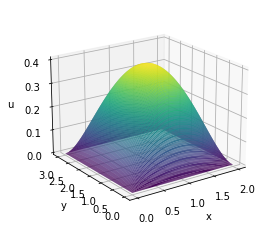

In [8]:

# representation graphique de la solution
uu=reshape(u,(M,N))
uubord=0*ones((M+2,N+2));
uubord[1:M+1,1:N+1]=uu;
#print(A.toarray())
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
X, Y = meshgrid(linspace(0,L,N+2),linspace(0,H,M+2))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, uubord, 50, cmap='binary')
ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(20, -125)

## Validation Dirichlet inhomogène
Coder le problème de Dirichlet inhomogène et le valider
On construit une validation du problème de Dirichlet inhomogène.

On choisit une fonction non triviale , y compris sur le bord. On calcule le second membre correspondant. On reprend la construction de la solution approchée de Dirichlet homogène et on vient rajouter dans un vecteur au second membre la contribution des termes de Dirichlet inhomogène. On évalue alors la solution exacte en ces points du bord puisque ce sont une donnée du problème.

Puis on calcule l'erreur entre la solution exacte et approchée. Pour se simplifier la vie, on lie $N$ et $M$ pour regarder l'erreur comme fonction d'un paramètre, $N$.  

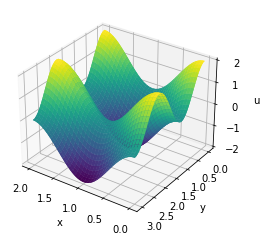

In [10]:
# sur le domaine [0,L]x[0,H]
utild=lambda x,y: cos(pi*x)+cos(pi*y) # solution exacte
ftild=lambda x,y:pi**2*(cos(pi*x)+cos(pi*y)) # second membre associé


L=2
H=3
N=33
M=44
h=H/(M+1)
l=L/(N+1)
# construction du vecteur de discrétisation
x=linspace(l,L-l,N)
xtild=linspace(0,L,N+2)
y=linspace(h,H-h,M)
ytild=linspace(0,H,M+2)
    


# Construction de la matrice

    
D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
D1=-1/l**2*ones(N*M)# surdiagonale
D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
DM1=-1/l**2*ones(N*M)# sousdiagonale
DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
DN=-1/h**2*ones(N*M)
A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)# A est pentadiagonale
#
SM=[]
#k=0
for j in range(M):
    for i in range(N):
#        k+=1
#on renseigne SM[k]
        SM.append(ftild(x[i],y[j])) #variante plus couteuse que les calculs sur tableaux
f_bord=zeros(N*M)
for i in range(N):
    f_bord[i]+=utild(x[i],0)/(h**2) # bord bas
    f_bord[(M-1)*N+i]+=utild(x[i],H)/(h**2)# bord haut
for j in range(M):
    f_bord[j*N]+= utild(0,y[j])/(l**2) # bord gauche
    f_bord[j*N+N-1]+=utild(L,y[j])/(l**2)# bord droit

    
SM+=f_bord
    
    
U=spsolve(A,SM)
# representation graphique de la solution
uubord_ex=zeros((M+2,N+2))
for j in range(M+2):
    for i in range(N+2):
        uubord_ex[j,i]=utild(i*l,j*h)
#print(A.toarray())
uu=reshape(U,(M,N))
uubord=uubord_ex;
uubord[1:M+1,1:N+1]=uu;
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
X, Y = meshgrid(linspace(0,L,N+2),linspace(0,H,M+2))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, uubord, 50, cmap='binary')
ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.plot_surface(X, Y, uubord_ex, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(30, 125)


0.0008937373060975618


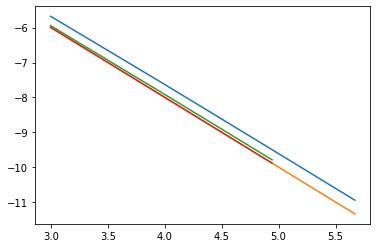

In [17]:
#
# La fonction pour calculer l'erreur
#
def erreur_Dirchlet_2D_inhomogene(N,M,u,f,p):
# N est le nombre de points de discrétisation en abscisse
# M est le nombre de points de discrétisation en ordonnée
# u et f les fonctions passées en argument, on pourra en changer 
# en definissant d'autres fonctions
# p est l'entier pour la norme l^p
    L=2
    H=1.2
    h=H/(M+1)
    l=L/(N+1)
    # construction du vecteur de discrétisation
    x=linspace(l,L-l,N)
    xtild=linspace(0,L,N+2)
    y=linspace(h,H-h,M)
    ytild=linspace(0,H,M+2)
    
    
    D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
    D1=-1/l**2*ones(N*M)# surdiagonale
    D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
    DM1=-1/l**2*ones(N*M)# sousdiagonale
    DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
    DN=-1/h**2*ones(N*M)
    A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
    A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)# A est pentadiagonale
    #
    SM=[]
    for j in range(M):
        for i in range(N):
            SM.append(f(x[i],y[j])) #variante plus couteuse que les calculs sur tableaux
    f_bord=zeros(N*M)
    for i in range(N):
        f_bord[i]+=u(x[i],0)/(h**2) # bord bas
        f_bord[(M-1)*N+i]+=u(x[i],H)/(h**2)# bord haut

    for j in range(M):
        f_bord[j*N]+= u(0,y[j])/(l**2) # bord gauche
        f_bord[j*N+N-1]+=u(L,y[j])/(l**2)# bord droit

    
    SM+=f_bord
    
    
    U=spsolve(A,SM)
    #le vecteur erreur err
    err=[]
    for j in range(M):
        for i in range(N):
            err.append(abs(U[j*N+i]-u(x[i],y[j])))

    normerr=sum([ei**p for ei in err])
    normerr=normerr**(1/p)
    #erreur relative
    normeU=sum([abs(ui)**p for ui in U])
    normeU=normeU**(1/p)
    #return max(err)/max(abs(U))
    return normerr/normeU

#on evalue l'erreur
print(erreur_Dirchlet_2D_inhomogene(40,40,utild,ftild,9))
errtab=[]
Ntab=[]

for N in range(20,300,30):
    Ntab.append(N)
    errtab.append(erreur_Dirchlet_2D_inhomogene(N,N,utild,ftild,9))
plot(log(Ntab),log(errtab),log(Ntab),-2*log(Ntab))
errtab=[]
Ntab=[]
#on teste avec une autre liaison de N et M
for N in range(20,150,30):
    Ntab.append(N)
    errtab.append(erreur_Dirchlet_2D_inhomogene(N,2*N,utild,ftild,2))
plot(log(Ntab),log(errtab),log(Ntab),-2*log(Ntab))
# le parallélisme de ces courbes démontrent l'ordre 2

## Robin inhomogène
Coder le problème de Robin inhomogène à coefficients variables, puis le valider.
Il est conseillé de procéder par étape, en construisant et validant d'abord Robin homogène à coefficient constant.

Après avoir compris et valider un problème de Robin 1D, l'extension 2D est naturelle, à condition d'avoir compris la complexité de la numérotation en 2D. La grille de discrétisation couvre les bords du domaine. Sur les noeuds du bord, la condition limite est utilisée pour éliminer le point fictif intervenant dans le schéma à 5 points. Comme en 1D, une approximation centrée de la dérivée permet de conserver des approximations à erreur quadratique.

Les 4 points de la discrétisation correspondant aux 4 coins font intervenir 2 points fictifs, ils sont éliminés en utilisant les CL pour la normale horizontale (terme en $\partial_x^2$) et pour la normale verticale (terme en $\partial_y^2$). On utilise la normale qui nous arange selon le terme vu que la normale n'est pas définie en ce point.   

In [20]:
#2D
#Probleme Robin inhomogene 2D 
#
# taille du domaine [0,L]x[0,H]
L=1.; #2
H=2.; #3
# nombre de points de discretisation et pas de maillage
N=100; #100
M=180; #180

#Les fonctions du bord intervenant dans la CL
# les fonctions choisies ici permettent de tester le cas dégénré vers Dirichlet inhomogène
def d(x,y):
    return 1.e10
def g(x,y):
    return 1.e10*(x+2*y)
#
l=L/(N-1);
h=H/(M-1);
# vecteur discretisation selon x
x=linspace(0,L,N)
# vecteur discretisation selon y
y=linspace(0,H,M)
#construction de la matrice A par ses diagonales 
#

D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale

D1=-1/l**2*ones(N*M)# surdiagonale
D1[N::N]=0. #correction de la surdiagonale (voisin de droite n existe pas au bord droit)
DM1=-1/l**2*ones(N*M)# sousdiagonale
DM1[N-1::N]=0. #correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
DN=-1/h**2*ones(N*M)
DMN=-1/h**2*ones(N*M)


for i in range(N):
    D0[i]+= 2/h*d(x[i],0)#Robin bord
    D0[(M-1)*N+i]+= 2/h*d(x[i],H)
    DN[N+i] *= 2
    DMN[(M-2)*N+i] *=2

for j in range(M):
    D0[j*N]+= 2/l*d(0,y[j])
    D0[j*N+N-1]+=2/l*d(L,y[j])
    D1[j*N+1] *= 2
    DM1[j*N+N-2] *= 2

A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DMN,[-N],N*M,N*M)# A est pentadiagonale
#construction d'un second membre trivial
f=100*ones(N*M)

#print(A.toarray())
#correction de f

f_inhom=zeros(N*M)

for i in range(N):
    f_inhom[i]+= 2/h*g(x[i],0)
    f_inhom[(M-1)*N+i]+= 2/h*g(x[i],H)

for j in range(M):
    f_inhom[j*N]+= 2/l*g(0,y[j])
    f_inhom[j*N+N-1]+=2/l*g(L,y[j])

sm=f+f_inhom
#resolution du systeme lineaire creux
#
t=time()
u=spsolve(A,sm)
t2=time()
print('resolution systeme done in %5.4f s' % (t2 - t))
print('2 coins',u[N-1],u[N*M-1])



resolution systeme done in 0.0846 s
2 coins 1.0000000000689655 4.999999999879046


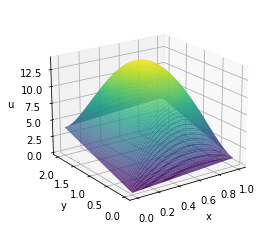

In [21]:
# representation graphique de la solution


uu=reshape(u,(M,N))

#print(A.toarray())
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
X, Y = meshgrid(linspace(0,L,N),linspace(0,H,M))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, uubord, 50, cmap='binary')
ax.plot_surface(X, Y, uu, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(20, -125)